## Importing Necessary Libraries

In [1]:
# Preprocessing and Visualizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Importing Dataset

In [2]:
df = pd.read_csv("bodyfat.csv")

#### Taking a glance at the data

In [3]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

#### Checking For missing values

In [4]:
df.isnull().sum().sum()

0

#### Finding the number of Rows and Columns

In [5]:
df.shape

(252, 15)

## Exploratory Data Analysis

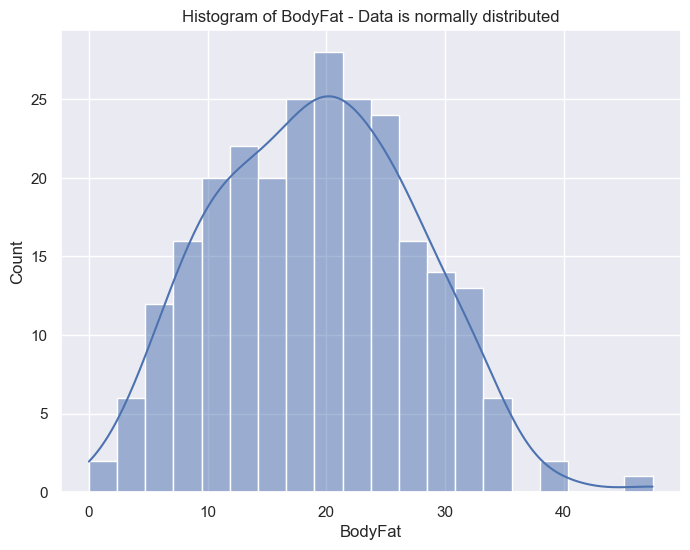

In [6]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BodyFat', bins=20, kde=True)

plt.title('Histogram of BodyFat - Data is normally distributed')
plt.xlabel('BodyFat')
plt.show()

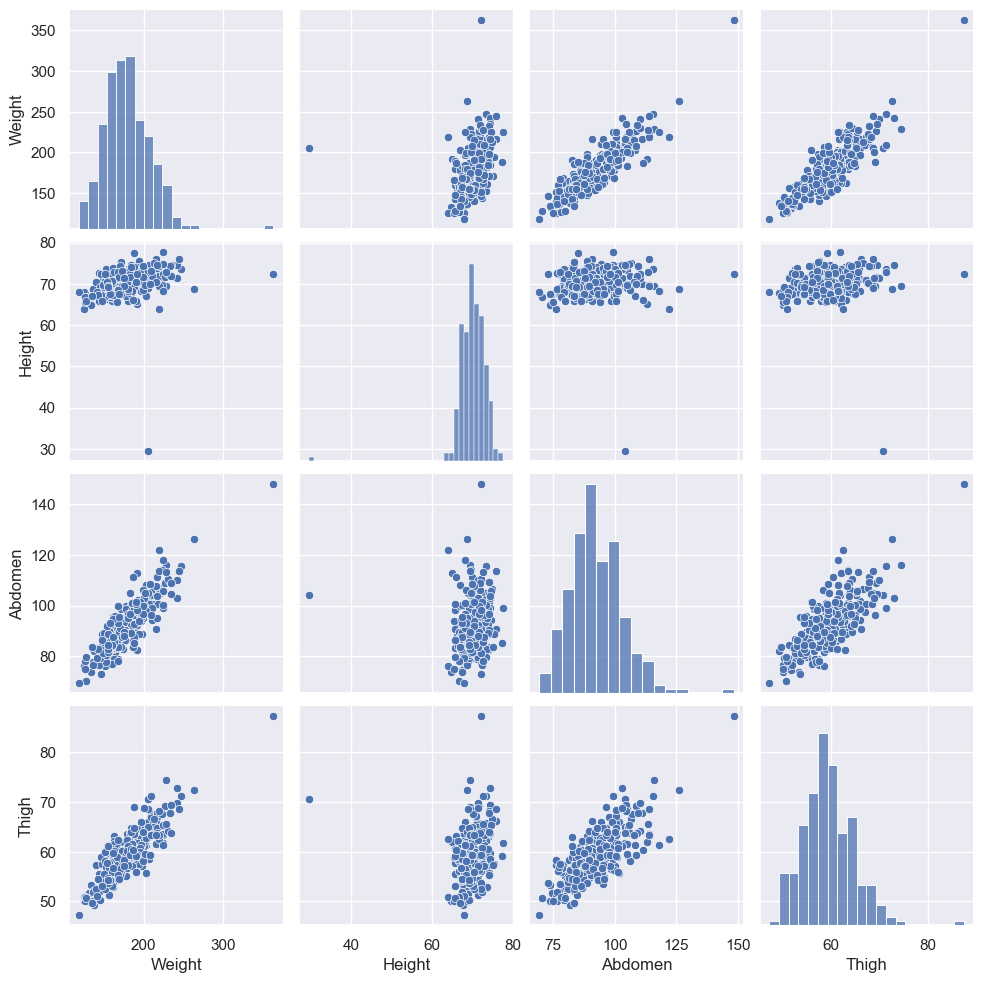

In [7]:
sns.pairplot(df[['Weight', 'Height', 'Abdomen', 'Thigh']])
plt.show()

In [8]:
# Correlation heatmap

corr_matrix = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Correlation between different features')
plt.show()

#### BodyFat is highly correlated to Density, Chest circumference, Abdomen circumference & Weight, Hips circumference and Thighs circumference to some extent 

## Splitting the dataset (80/20 split)

In [9]:
y = df['BodyFat']
X = df.drop('BodyFat', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

#### Standardzing the data

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

## Deep Learning Model

#### Making a sequential model with 3 hidden layers and 1 output layer

In [11]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))

#### Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Defining Learning Rate and Compiling the Model with Adam optimizer

In [13]:
learning_rate = 0.1
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate),
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

#### Running the model for 100 epochs and fitting it onto our data

In [14]:
epochs = 100
batch_size = 10
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 592.4760 - root_mean_squared_error: 24.3408 - val_loss: 235.8345 - val_root_mean_squared_error: 15.3569
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 232.2355 - root_mean_squared_error: 15.2393 - val_loss: 102.0795 - val_root_mean_squared_error: 10.1034
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 110.9919 - root_mean_squared_error: 10.5353 - val_loss: 171.4410 - val_root_mean_squared_error: 13.0935
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 50.5209 - root_mean_squared_error: 7.1078 - val_loss: 23.3264 - val_root_mean_squared_error: 4.8297
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 18.8459 - root_mean_squared_error: 4.3412 - val_loss: 21.1877 - val_root_mean_squared_error: 4.6030
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 11.4000 - root_mean_squared_error: 3.3764 - val_lo

18/18 [==============================] - 0s 1ms/step - loss: 12.0470 - root_mean_squared_error: 3.4709 - val_loss: 8.9169 - val_root_mean_squared_error: 2.9861
Epoch 49/100
18/18 [==============================] - 0s 1ms/step - loss: 4.2885 - root_mean_squared_error: 2.0709 - val_loss: 5.7532 - val_root_mean_squared_error: 2.3986
Epoch 50/100
18/18 [==============================] - 0s 1ms/step - loss: 3.4814 - root_mean_squared_error: 1.8658 - val_loss: 3.6947 - val_root_mean_squared_error: 1.9221
Epoch 51/100
18/18 [==============================] - 0s 1ms/step - loss: 4.7687 - root_mean_squared_error: 2.1837 - val_loss: 5.0594 - val_root_mean_squared_error: 2.2493
Epoch 52/100
18/18 [==============================] - 0s 1ms/step - loss: 2.1505 - root_mean_squared_error: 1.4665 - val_loss: 5.1354 - val_root_mean_squared_error: 2.2661
Epoch 53/100
18/18 [==============================] - 0s 1ms/step - loss: 3.0063 - root_mean_squared_error: 1.7339 - val_loss: 5.8393 - val_root_mean_sq

Epoch 96/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7570 - root_mean_squared_error: 0.8701 - val_loss: 2.9847 - val_root_mean_squared_error: 1.7276
Epoch 97/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7368 - root_mean_squared_error: 0.8583 - val_loss: 2.0349 - val_root_mean_squared_error: 1.4265
Epoch 98/100
18/18 [==============================] - 0s 1ms/step - loss: 0.9542 - root_mean_squared_error: 0.9768 - val_loss: 2.6673 - val_root_mean_squared_error: 1.6332
Epoch 99/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7001 - root_mean_squared_error: 0.8367 - val_loss: 2.3842 - val_root_mean_squared_error: 1.5441
Epoch 100/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7925 - root_mean_squared_error: 0.8902 - val_loss: 2.7877 - val_root_mean_squared_error: 1.6697


In [15]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, batch_size=batch_size)
print("RMSE:", loss)

6/6 [==============================] - 0s 642us/step - loss: 1.6678 - root_mean_squared_error: 1.2914
RMSE: 1.6677651405334473
